#Problem Statement
**Predicting Turbine Energy Yield (TEY) using ambient variables as features.**

In [4]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing dataset
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [6]:
df=pd.read_csv("gas_turbines.csv")

In [7]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


#About Dataset
+ The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

#Attribute Information:
The explanations of sensor measurements and their brief statistics are given below.
+ Variable (Abbr) Unit Min Max Mean
+ Ambient temperature (AT) C â€“6.23 37.10 17.71
+ Ambient pressure (AP) mbar 985.85 1036.56 1013.07
+ Ambient humidity (AH) (%) 24.08 100.20 77.87
+ Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
+ Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
+ Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
+ Turbine after temperature (TAT) C 511.04 550.61 546.16
+ Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
+ Turbine energy yield (TEY) MWH 100.02 179.50 133.51
+ Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
+ Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

#Data Exploration

In [8]:
df.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [9]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [10]:
df.shape

(15039, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [12]:
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [14]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [15]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

#Data Visualization
**Univariate plots**

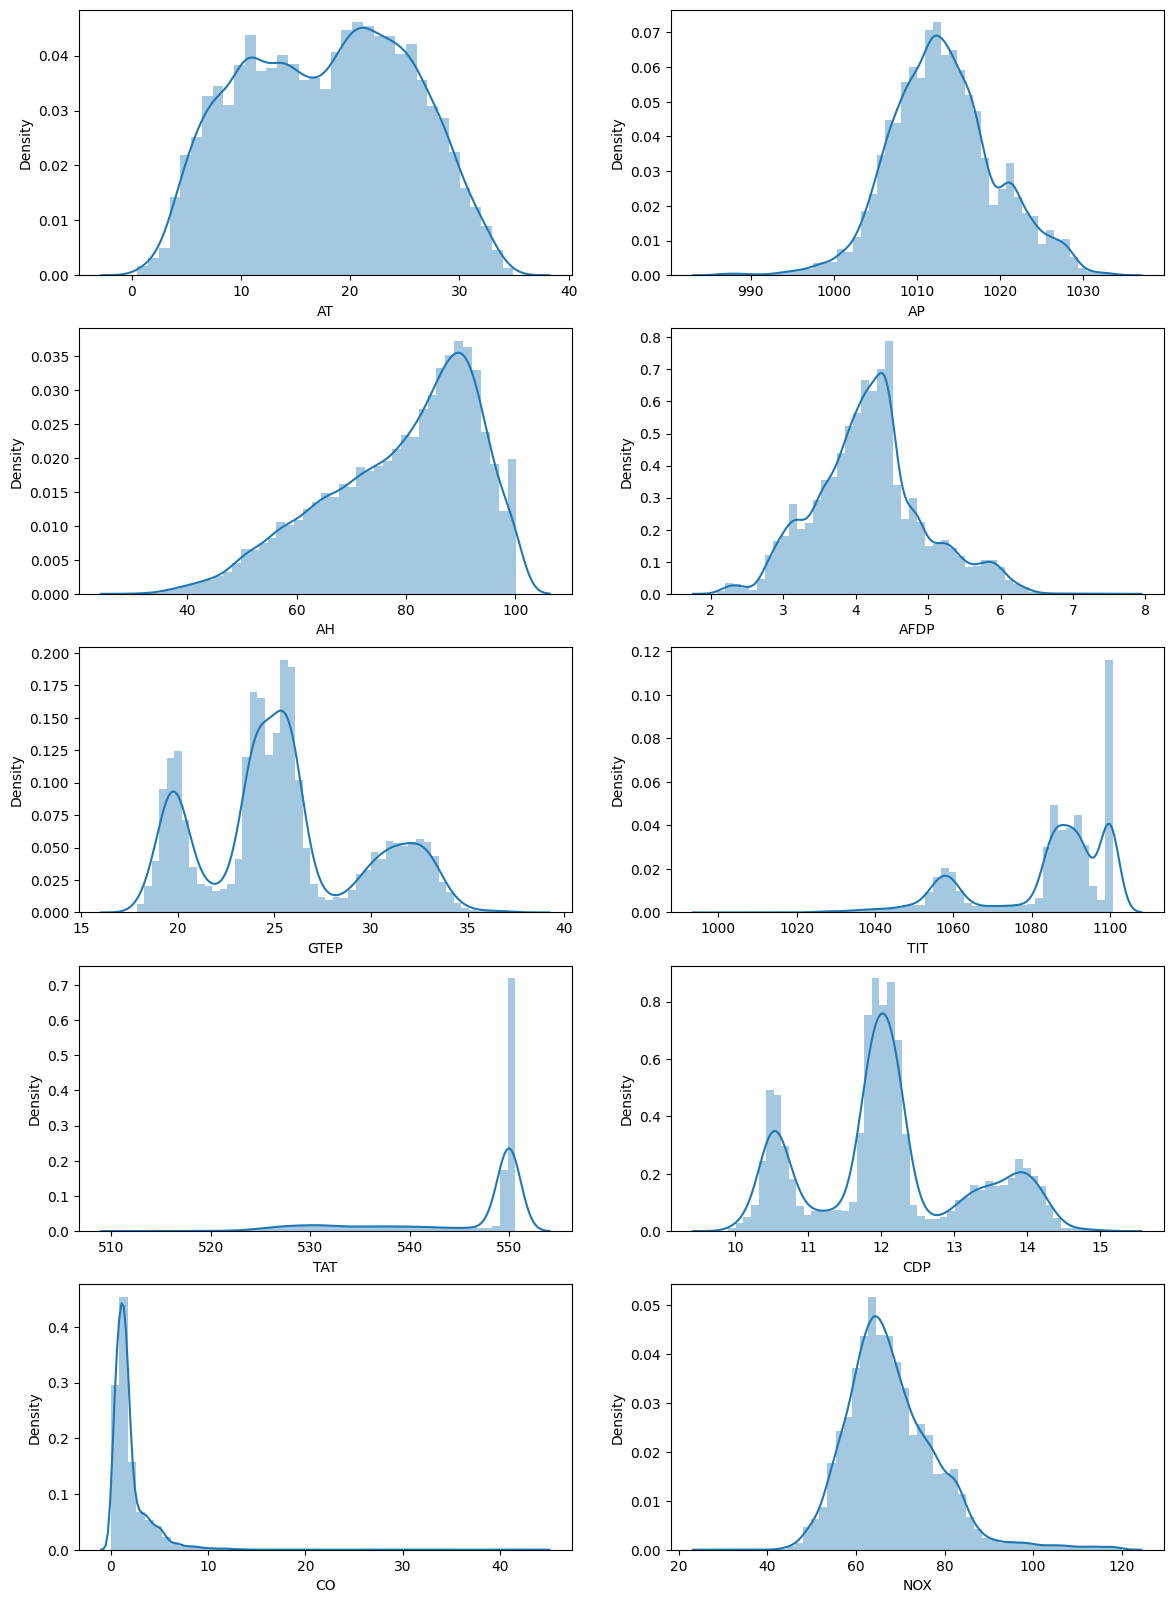

In [16]:
fig, ax = plt.subplots(5,2, figsize = (14,20))

sns.distplot(df.AT, ax = ax[0,0])
sns.distplot(df.AP, ax = ax[0,1])
sns.distplot(df.AH, ax = ax[1,0])
sns.distplot(df.AFDP, ax = ax[1,1])
sns.distplot(df.GTEP, ax = ax[2,0])
sns.distplot(df.TIT, ax = ax[2,1])
sns.distplot(df.TAT, ax = ax[3,0])
sns.distplot(df.CDP, ax = ax[3,1])
sns.distplot(df.CO, ax = ax[4,0])
sns.distplot(df.NOX, ax = ax[4,1])

plt.show()

##**Outliers Detection**

In [17]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    for col in df.columns.tolist():         # iterate over features(columns)
        Q1 = np.percentile(df[col],25)      # 1st quartile (25%)
        Q3 = np.percentile(df[col],75)      # 3rd quartile (75%)
        IQR = Q3 - Q1                       # Interquartile rrange (IQR)

        outlier_step = 1.5 * IQR            # outlier step

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # Append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # Select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features]))))

The dataset contains 1543 observations with more than 2 outliers


In [18]:
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

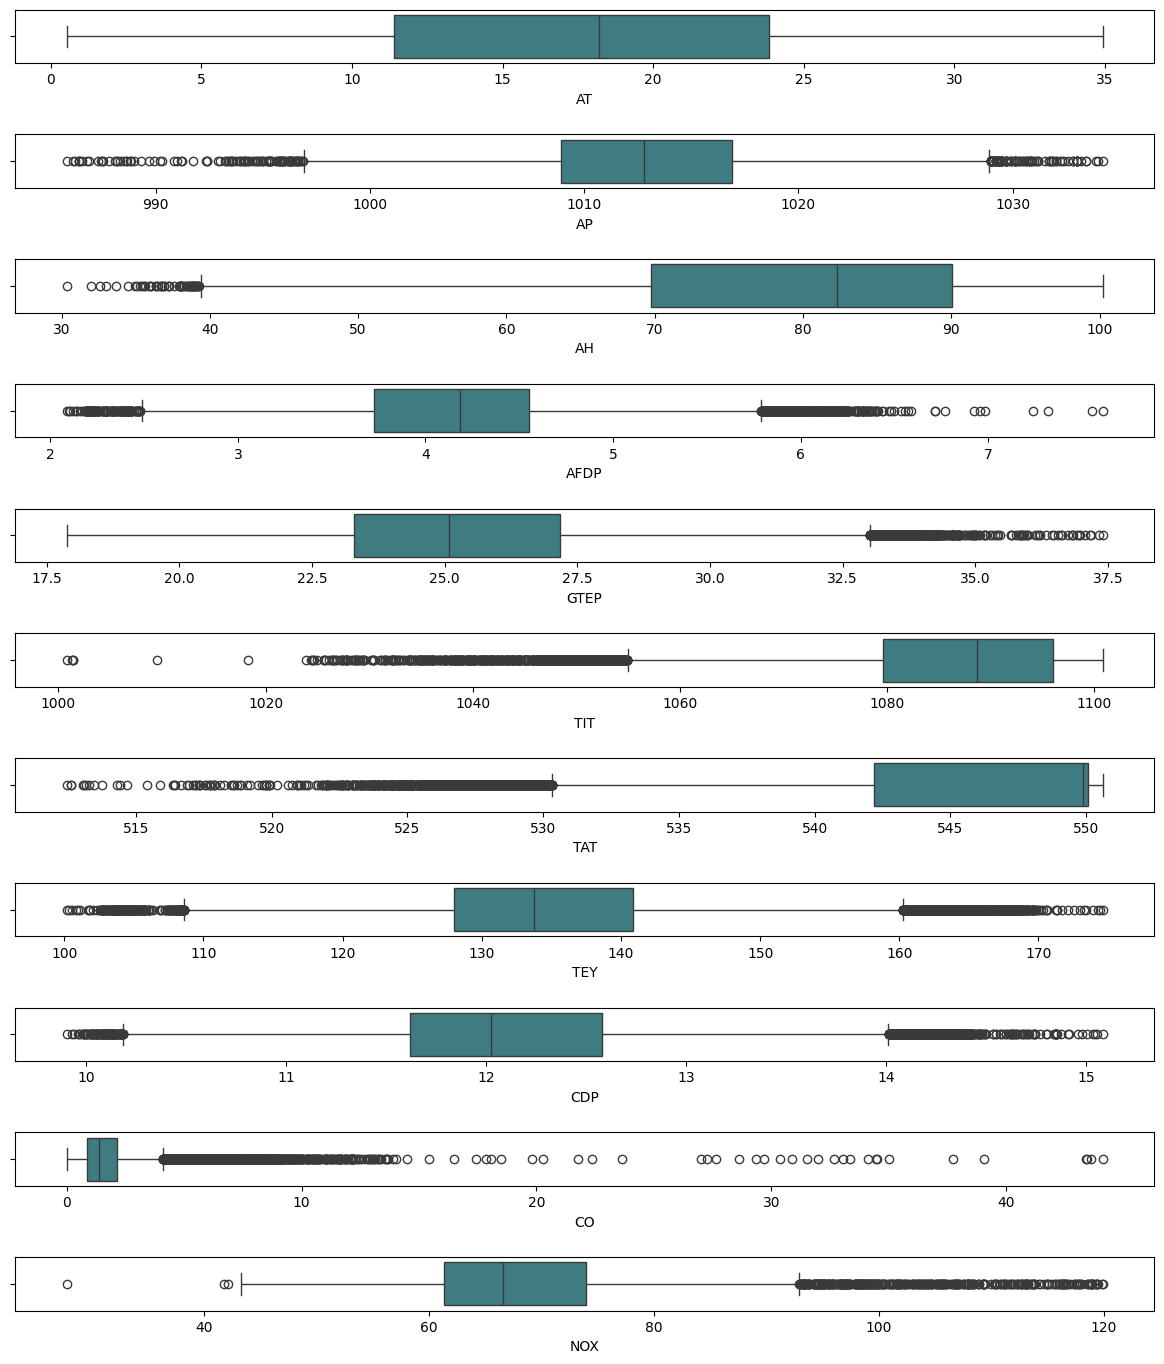

In [19]:
outlier = df.copy()
fig, axes=plt.subplots(11,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='AT',data= outlier,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data= outlier,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data= outlier,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data= outlier,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data= outlier,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data= outlier,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data= outlier,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data= outlier,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data= outlier,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data= outlier,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data= outlier,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

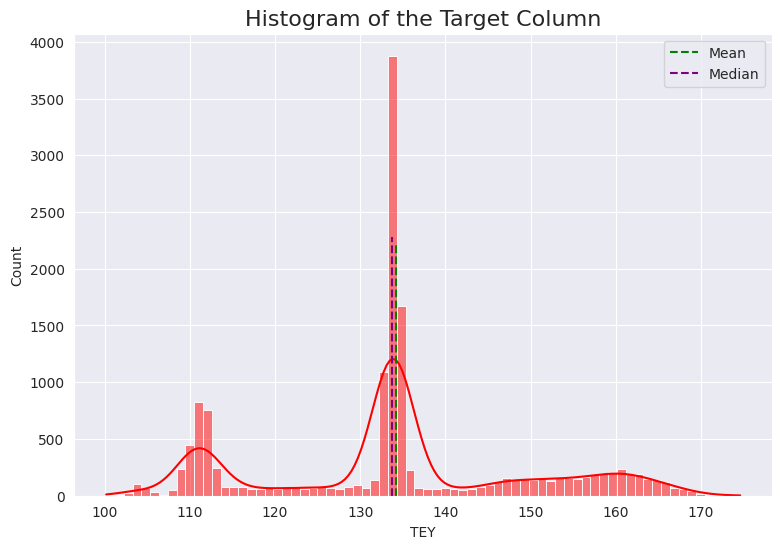

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize=(9,6))
sns.histplot(data= df, x= "TEY", color= "red", kde= True)
plt.axvline(x=df["TEY"].mean(), ymax= 0.55, color= "green", linestyle= '--', label= "Mean")
plt.axvline(x=df["TEY"].median(), ymax= 0.56, color= "purple", linestyle= '--',label= "Median")
plt.title("Histogram of the Target Column", fontsize=16)
plt.legend();

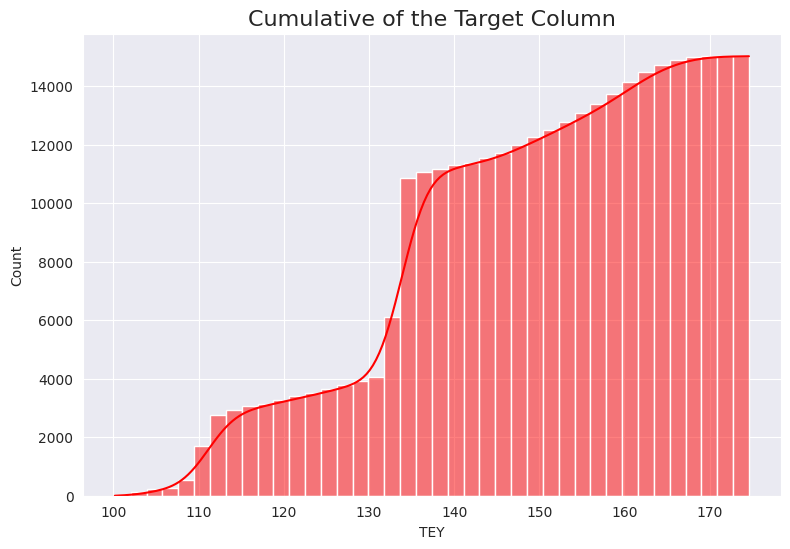

In [21]:
plt.figure(figsize = (9,6))
sns.histplot(df["TEY"], kde= True, bins= 40, color= "red", cumulative= True)
plt.title("Cumulative of the Target Column", fontsize=16);

**Unsurprisingly, Mostly none of the features are on the same scale as we already saw in the previous section.**

##**Correlation Matrix**

In [22]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


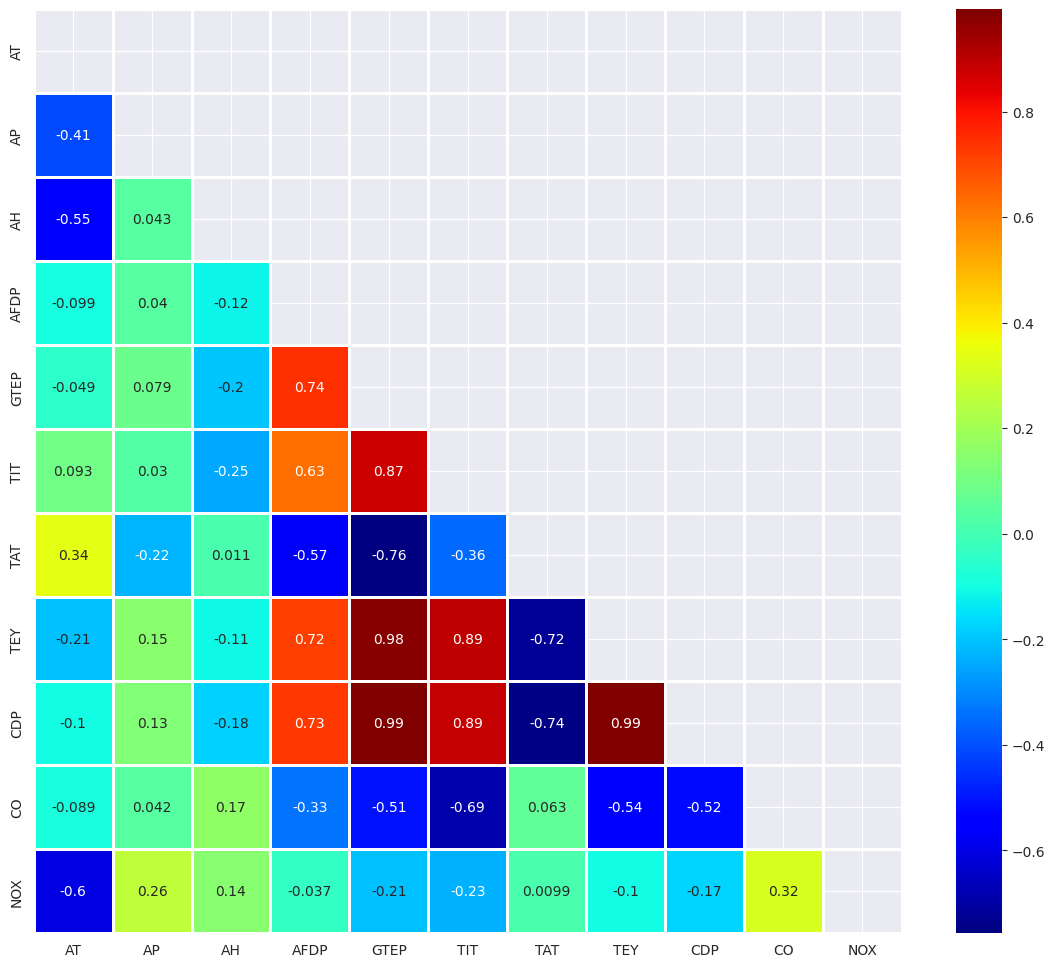

In [23]:
plt.figure(figsize=(14,12))
mask =np.zeros_like(df.corr(), dtype= bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data= df.corr(), cmap= "jet", annot= True, linewidths= 1, linecolor= 'white', mask=mask);

In [24]:
x = df.drop('TEY', axis=1)
y = df[["TEY"]]

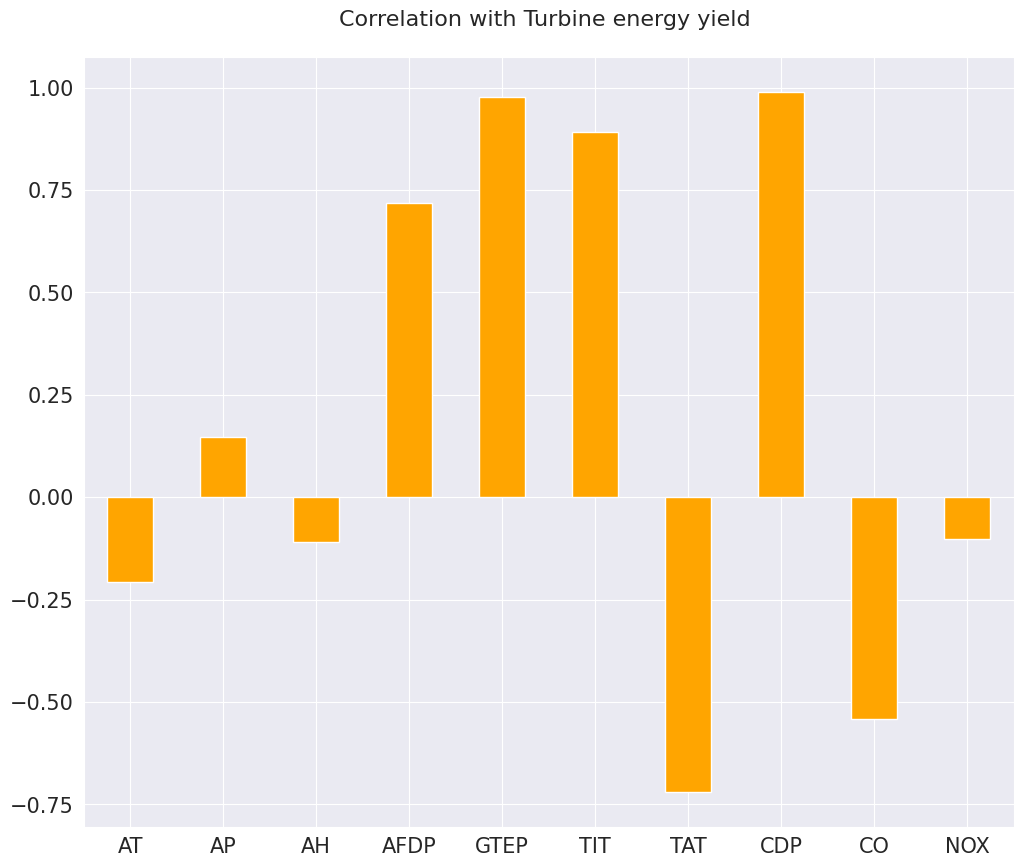

In [25]:
data2 = df.copy()

correlations = data2.corrwith(df.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations>0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize=(12,10), fontsize = 15, color = 'orange', rot = 0, grid = True)
plt.title('Correlation with Turbine energy yield \n', fontsize = "16", fontfamily = "sans-serif")
plt.show()

#Data Pre-Processing
##**Feature Selection Technique**

In [26]:
from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_regression

In [27]:
#Feature Extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

In [28]:
#Summarize Scores
scores = fit.scores_
features = fit.transform(x)

In [29]:
score_df = pd.DataFrame(list(zip(scores, x.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.712004,CDP
4,1.599452,GTEP
5,1.323352,TIT
6,0.893736,TAT
3,0.660717,AFDP
8,0.512905,CO
0,0.412621,AT
9,0.300922,NOX
1,0.139880,AP
2,0.097492,AH


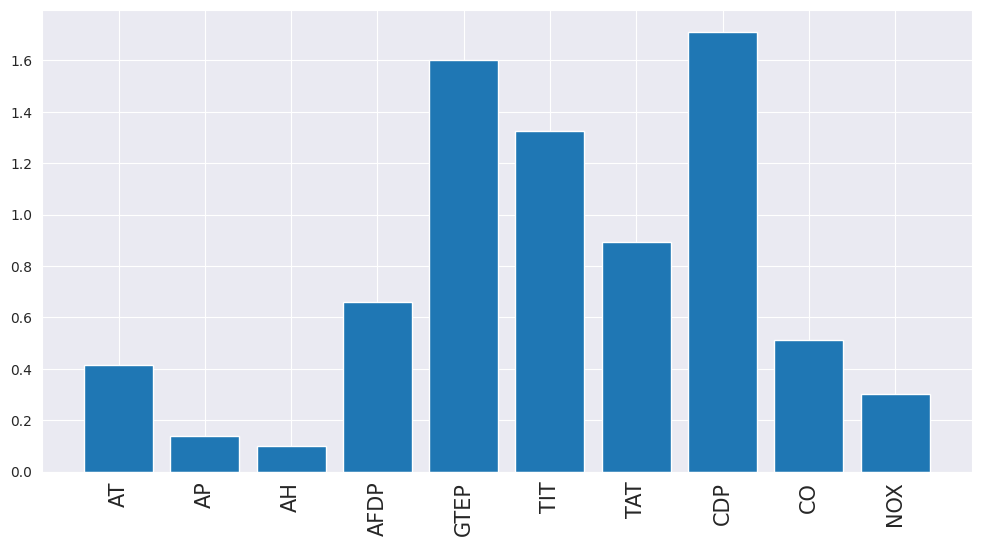

In [30]:
fig, axes = plt.subplots(figsize=(12,6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

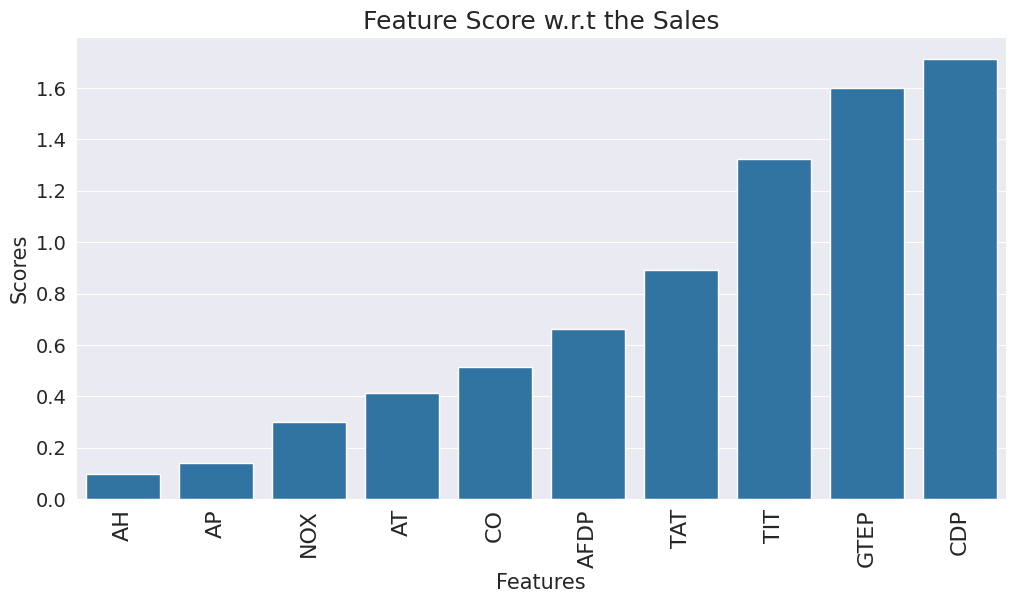

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [32]:
score_df.sort_values('Score', ascending=False)

,Score,Feature
7,1.712004,CDP
4,1.599452,GTEP
5,1.323352,TIT
6,0.893736,TAT
3,0.660717,AFDP
8,0.512905,CO
0,0.412621,AT
9,0.300922,NOX
1,0.139880,AP
2,0.097492,AH


In [33]:
model_data = df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


##Feature Engineering
+ Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores

##**Applying Standard Scaler**

In [34]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [35]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


In [37]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1))

Mean
 CDP     0.0
GTEP   -0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT      0.0
TEY     0.0
dtype: float64


In [38]:
print('Standard Devaition','\n',np.round(df_standard_scaled.std(),1))

Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64


##**Test Train Split With Imbalanced Dataset**

In [39]:
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
x

,CDP,GTEP,TIT,TAT,AFDP,CO,AT
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693
...,...,...,...,...,...,...,...
15034,-1.543161,-1.498657,-2.063184,0.103453,-0.865850,1.145792,-1.153182
15035,-1.513247,-1.438759,-2.268905,-0.276638,-0.913470,1.293578,-1.303986
15036,-1.467922,-1.410967,-2.789257,-1.026650,-0.951488,2.695925,-1.386267
15037,-1.422598,-1.447624,-2.456474,-0.528337,-0.988848,1.924683,-1.420423


In [41]:
x_train=df_standard_scaled.drop('TEY',axis=1)

In [42]:
y

,TEY
0,-1.231172
1,-1.229909
2,-1.230541
3,-1.229909
4,-1.229909
...,...
15034,-1.426381
15035,-1.415642
15036,-1.516089
15037,-1.481343


In [43]:
y_train=df_standard_scaled[['TEY']]

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [45]:
print("Shape of X_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (15039, 7)
Shape of y_train: (15039, 1)


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
print("Training Set Class Distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting Set Class Distribution:")
print(y_test.value_counts(normalize=True))


Training Set Class Distribution:
TEY      
-0.028331    0.010057
-0.025804    0.009974
-0.027068    0.009392
-0.032754    0.009226
-0.025173    0.008478
               ...   
 0.183935    0.000083
 0.186462    0.000083
 0.187725    0.000083
 0.188357    0.000083
 2.540341    0.000083
Name: proportion, Length: 3780, dtype: float64

Testing Set Class Distribution:
TEY      
-0.032754    0.010638
-0.028331    0.009641
-0.027068    0.009641
-0.023909    0.009309
-0.025804    0.009309
               ...   
-0.227331    0.000332
-0.230490    0.000332
-0.237439    0.000332
-0.241229    0.000332
 2.553607    0.000332
Name: proportion, Length: 1554, dtype: float64


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [49]:
# Make predictions on the testing data
y_pred = model.predict(x_test)

In [56]:
y_pred

array([[ 4.23154520e-02],
       [-1.37451072e+00],
       [ 1.25460036e-03],
       ...,
       [ 7.15441204e-01],
       [ 9.71423571e-01],
       [-1.43628546e+00]])

In [50]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [51]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.03553481851548443
Mean Squared Error: 0.00238959488587079
Root Mean Squared Error: 0.048883482751035545
R-squared: 0.9976087476917022


## **Visualize MSE and MAE**

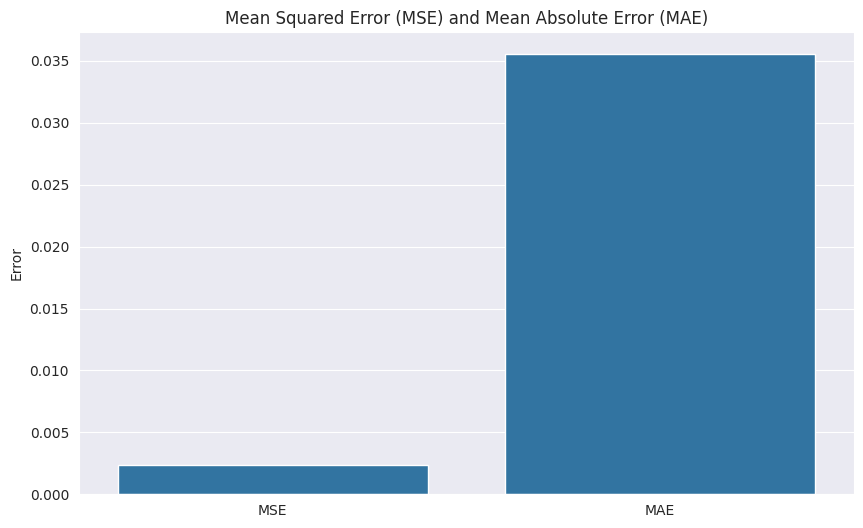

In [59]:
# Visualize MSE and MAE
metrics = ['MSE', 'MAE']
values = [mse, mae]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values)
plt.title('Mean Squared Error (MSE) and Mean Absolute Error (MAE)')
plt.ylabel('Error')
plt.show()

##**Visualize R-squared**

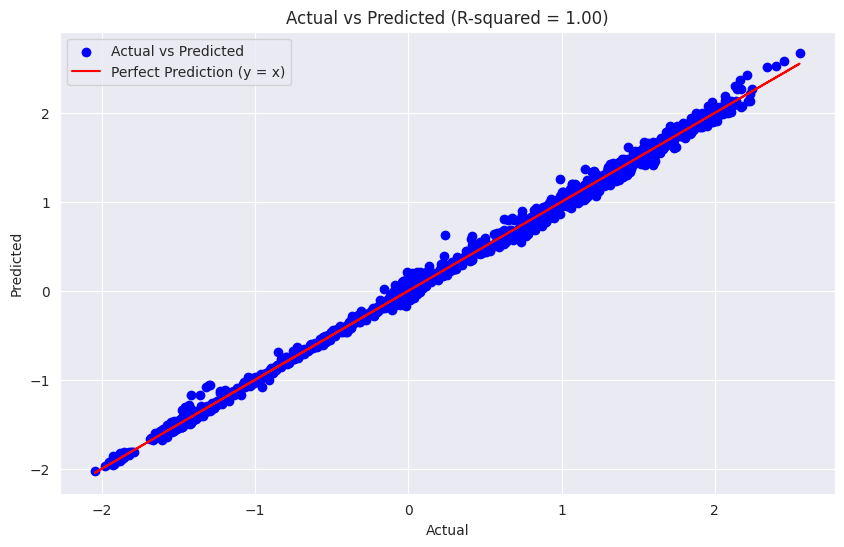

In [61]:
# Visualize R-squared
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction (y = x)')
plt.title('Actual vs Predicted (R-squared = {:.2f})'.format(r2))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [52]:
import joblib

# Combine training and testing data
X_full = pd.concat([x_train, x_test])
y_full = pd.concat([y_train, y_test])

In [53]:
# Initialize and train the model
final_model = LinearRegression()
final_model.fit(X_full, y_full)

LinearRegression()

In [54]:
# Save the model to a file
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']